In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('Customer Churn (1).csv')

In [91]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [93]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [95]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


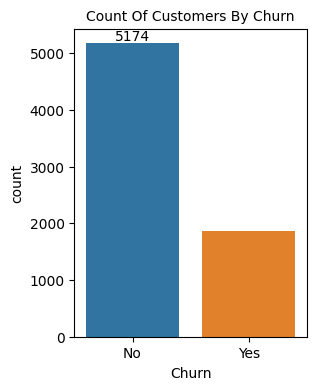

In [97]:
plt.figure(figsize = (3,4))
ax = sns.countplot( x = 'Churn' , data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers By Churn" , fontsize = 10)
plt.show()

In [98]:
gb = df.groupby("Churn").agg({'Churn' : "count"})
gb

,Churn
Churn,
No,5174
Yes,1869


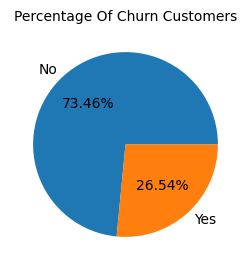

,Churn
Churn,
No,5174
Yes,1869


In [99]:
plt.figure(figsize = (3,3))
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'] , labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage Of Churn Customers" , fontsize = 10)
plt.show()
gb

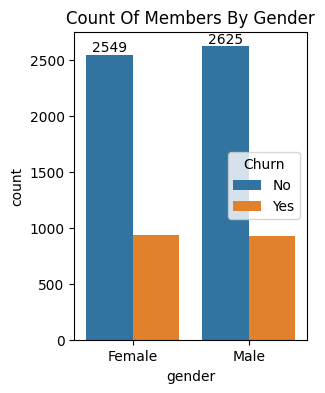

In [100]:
plt.figure(figsize = (3,4))
ax = sns.countplot( x = 'gender' , data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count Of Members By Gender")
plt.show()

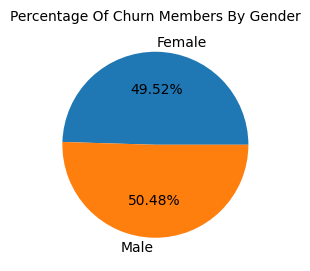

In [101]:
plt.figure(figsize = (3,4))
gb = df.groupby("gender").agg({'gender' : "count"})
plt.pie(gb['gender'] , labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage Of Churn Members By Gender" , fontsize = 10)
plt.show()

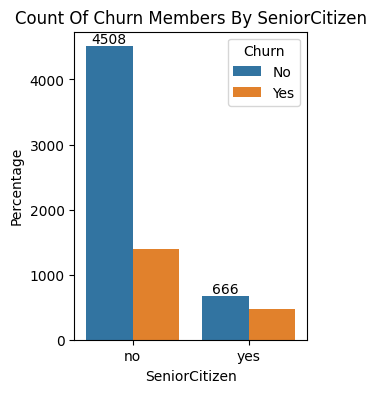

In [102]:
plt.figure(figsize = (3,4))
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
ax = sns.countplot( x = 'SeniorCitizen' , data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count Of Churn Members By SeniorCitizen")
plt.show()

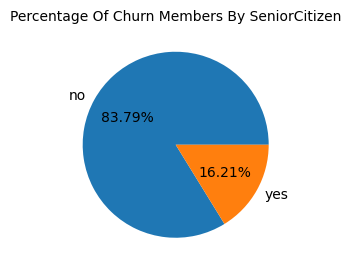

In [103]:
plt.figure(figsize = (3,4))
gb = df.groupby("SeniorCitizen").agg({'SeniorCitizen'  : "count"})
plt.pie(gb['SeniorCitizen'] , labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage Of Churn Members By SeniorCitizen" , fontsize = 10)
plt.show()

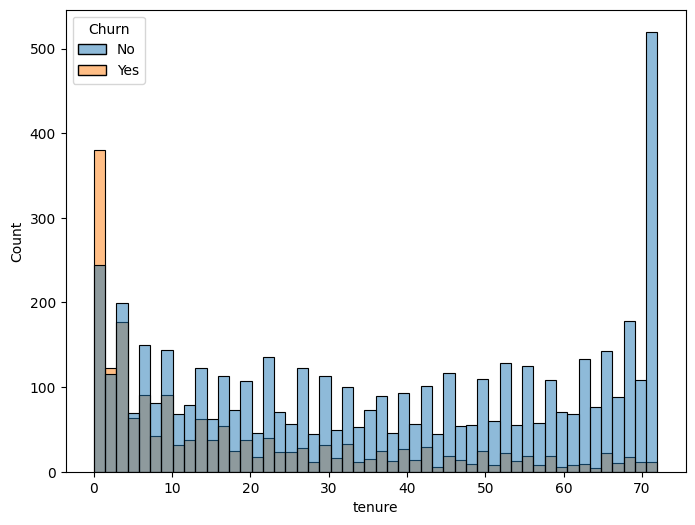

In [104]:
plt.figure(figsize = (8,6))
sns.histplot( x = "tenure" , data = df , bins = 50 , hue = 'Churn')
plt.show()

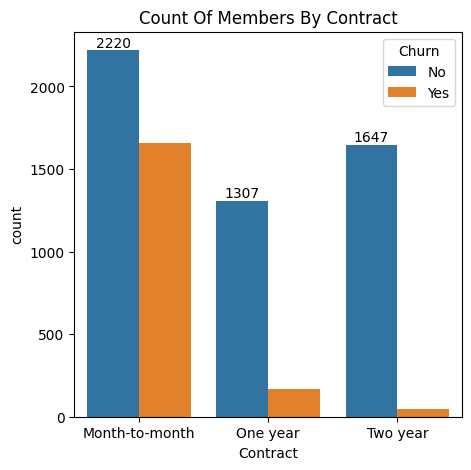

In [105]:
plt.figure(figsize = (5,5))
ax = sns.countplot( x = 'Contract' , data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count Of Members By Contract")
plt.show()

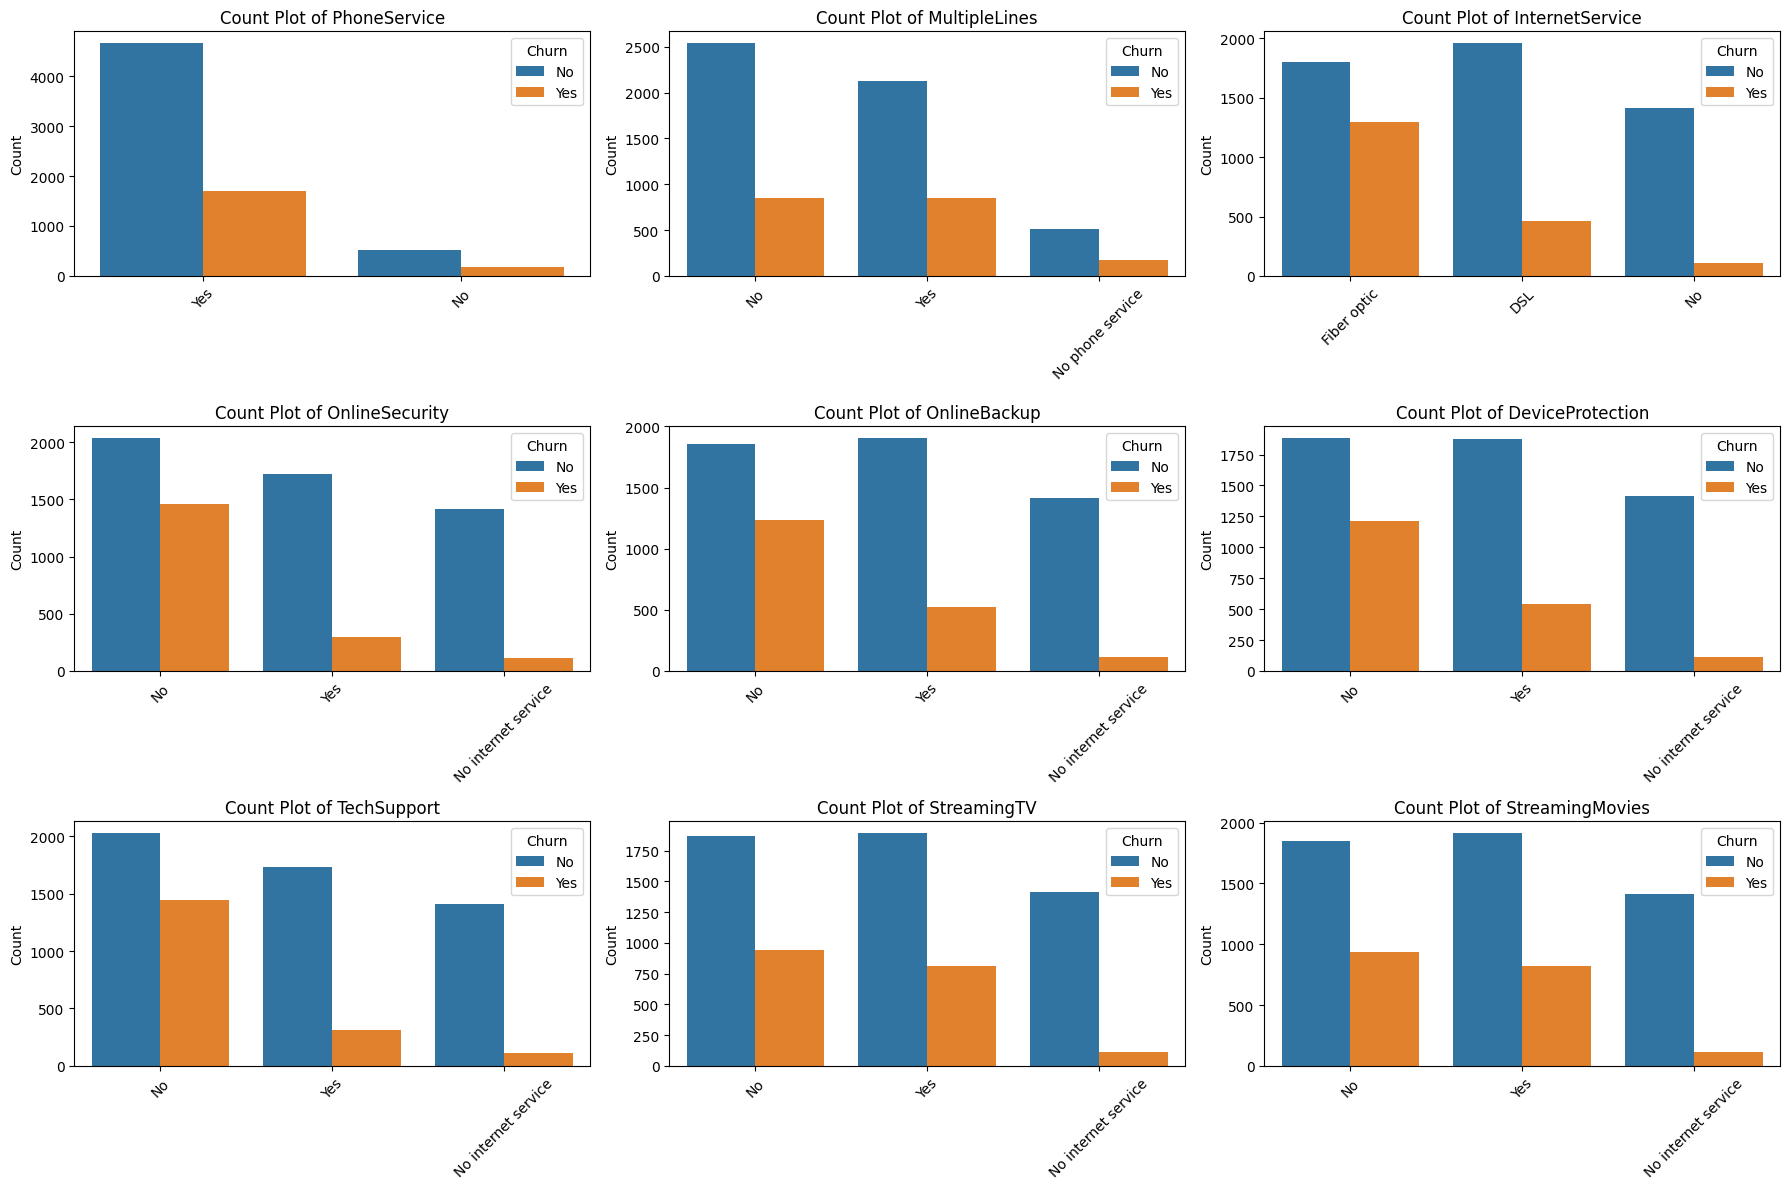

In [106]:


# Assuming df is your DataFrame
# List of columns for count plots
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Setup subplot grid
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

# Plotting each count plot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index , hue = df['Churn'])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


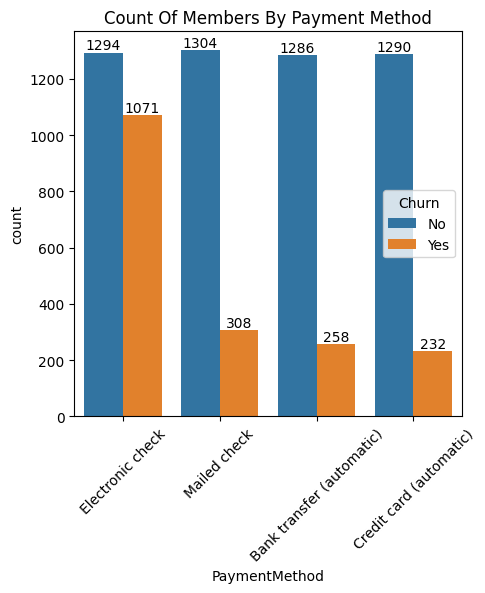

In [107]:
plt.figure(figsize = (5,5))
ax = sns.countplot( x = 'PaymentMethod' , data = df , hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title("Count Of Members By Payment Method")
plt.show()